In [1]:
import pandas as pd
import numpy as np
import json
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('us events ad_revenue filtered 03.02-07.02.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860079 entries, 0 to 860078
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   profile_id               860065 non-null  object
 1   os_version               860079 non-null  object
 2   device_manufacturer      860079 non-null  object
 3   device_model             860079 non-null  object
 4   device_type              860079 non-null  object
 5   device_locale            860079 non-null  object
 6   event_name               860079 non-null  object
 7   event_json               860079 non-null  object
 8   event_datetime           860079 non-null  object
 9   event_timestamp          860079 non-null  int64 
 10  event_receive_datetime   860079 non-null  object
 11  event_receive_timestamp  860079 non-null  int64 
 12  connection_type          860079 non-null  object
 13  operator_name            841200 non-null  object
 14  country_iso_code    

In [3]:
860079 - 536371

323708

In [4]:
df.head()

,profile_id,os_version,device_manufacturer,device_model,device_type,device_locale,event_name,event_json,event_datetime,event_timestamp,event_receive_datetime,event_receive_timestamp,connection_type,operator_name,country_iso_code,city
0,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 20:02:28,1643994148,2022-02-06 17:58:19,1644159499,wifi,NaN,US,Norwalk
1,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 20:02:45,1643994165,2022-02-06 17:58:19,1644159499,wifi,NaN,US,Norwalk
2,JLkVacrzHY6,11,Google,Pixel 2,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-05 17:53:05,1644072785,2022-02-06 16:59:29,1644155969,wifi,Verizon,US,Charlotte
3,JMC6wG3cX0f,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""int"",""placement"":""next_level"",""vie...",2022-02-06 17:09:01,1644156541,2022-02-06 17:09:24,1644156564,wifi,T-Mobile,US,Cocoa
4,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 17:15:38,1644156938,2022-02-06 17:16:16,1644156976,cell,Verizon,US,NaN


In [5]:
#есть пропуски, посчитаем в процентом количестве пропусков в каждой фиче
for column in df.columns:
    print('пропуски в ',column ,'= {:.2%}'.format(df[column].isna().sum()/df.shape[0]))

пропуски в  profile_id = 0.00%
пропуски в  os_version = 0.00%
пропуски в  device_manufacturer = 0.00%
пропуски в  device_model = 0.00%
пропуски в  device_type = 0.00%
пропуски в  device_locale = 0.00%
пропуски в  event_name = 0.00%
пропуски в  event_json = 0.00%
пропуски в  event_datetime = 0.00%
пропуски в  event_timestamp = 0.00%
пропуски в  event_receive_datetime = 0.00%
пропуски в  event_receive_timestamp = 0.00%
пропуски в  connection_type = 0.00%
пропуски в  operator_name = 2.20%
пропуски в  country_iso_code = 0.00%
пропуски в  city = 37.64%


Видим незначительные пропуски в первых колонках, но пропуски в последних сильно ощутимы, особеднно в колонке city. Для удобства переведем столбец  'event_json' в словарь.

In [6]:
df['event_json'] = df['event_json'].map(json.loads)
df = df.dropna(subset = ['profile_id'])

In [7]:
df['event_json'][0]

{'ad_type': 'banner',
 'placement': '',
 'view_index': 1,
 'session_view_index': 0,
 'cur_ticks': 637795729492245130,
 'session_length': 705.8807,
 'revenue': 0.000510313,
 'ads_ltv': 0.487876676518837,
 'ecpm_sma': 0.511508107185364,
 'normalized_ecpm_sma': 0.511508107185364,
 'value': 0.000510313,
 'currency': 'USD',
 'ad_country_code': 'US',
 'network_name': 'Google AdMob',
 'ad_unit_id': '64c6b1114ea8c1cc',
 'ad_network_placement': 'ca-app-pub-7511632782617496/8825263691',
 'creativeId': 'CJ3XirfD5vUCFYPnKAUdG3MOYQ'}

In [8]:
df['event_json'][0].get('revenue')


0.000510313

# Задание 1


## 1.1 построить распределение средних eCPM-ов юзеров для каждого формата рекламы

In [9]:
#создаем чистый датафрейм
df_prepared = pd.DataFrame()
#копируем колонку с profile_id в новый датафрейм
df_prepared['profile_id'] = df['profile_id']
#копируем колонку со значениями revenue из 'event_json'
df_prepared['revenue'] = df['event_json'].apply(lambda element: element.get('revenue'))
#копируем колонку со значениями ad_type из 'event_json'
df_prepared['ad_type'] = df['event_json'].apply(lambda element: element.get('ad_type'))
#копируем колонку с city новый датафрейм
df_prepared['city'] = df['city']
#копируем колонку с os_version новый датафрейм
df_prepared['os_version'] = df['os_version']

In [10]:
df_prepared

,profile_id,revenue,ad_type,city,os_version
0,JLjpGzDHBQm,0.000510,banner,Norwalk,11
1,JLjpGzDHBQm,0.000510,banner,Norwalk,11
2,JLkVacrzHY6,0.002386,banner,Charlotte,11
3,JMC6wG3cX0f,0.013894,int,Cocoa,10
4,JLzWWTJfi1b,0.006828,banner,NaN,10
...,...,...,...,...,...
860074,JLSQY2nx1NQ,0.000020,banner,Elmira,12
860075,JLKWwju79CA,0.006740,banner,Cherry Hill,12
860076,JLKWwju79CA,0.002780,banner,Cherry Hill,12
860077,JLKWwju79CA,0.002780,banner,Cherry Hill,12


In [11]:
#готовые данные для анализа c ad_type == 'banner'
df_banner = df_prepared.query("ad_type == 'banner'")

In [12]:
#группируем по пользователя данные, считаем количество одинаковых пользователей
#так же суммируем доход от каждого пользователя
df_banner = df_banner.groupby('profile_id').agg({'profile_id': 'count', 'revenue':'sum'})

In [13]:
#переименовываем столбца
df_banner.columns = ['count_id', 'sum_revenue']

In [14]:
#добавляем колонку с подсчитанным eCPM
df_banner['eCPM'] = df_banner['sum_revenue']/df_banner['count_id']*1000

In [15]:
# результат
df_banner

,count_id,sum_revenue,eCPM
profile_id,,,
JL00qCZH1HV,13,0.041391,3.183940
JL015rw9vmN,411,0.477067,1.160748
JL01aCdFTJy,38,0.028124,0.740097
JL04ODuw9UP,80,0.017058,0.213227
JL06OWhBYxn,13,0.006086,0.468146
...,...,...,...
JMLPzy9jBZu,1,0.000474,0.474300
JMLQTj4i34Y,34,0.006081,0.178844
JMLY5SO7wmn,10,0.003060,0.306027


In [16]:
#сделаем то же самое для пользователей с ad_type == int
df_int = df_prepared.query("ad_type == 'int'")
df_int = df_int.groupby('profile_id').agg({'profile_id': 'count', 'revenue':'sum'})
df_int.columns = ['count_id', 'sum_revenue']
df_int['eCPM'] = df_int['sum_revenue']/df_int['count_id']*1000
df_int

,count_id,sum_revenue,eCPM
profile_id,,,
JL015rw9vmN,18,0.395698,21.983199
JL01aCdFTJy,1,0.011966,11.965651
JL04ODuw9UP,2,0.046320,23.160000
JL06b4k4ygp,2,0.014655,7.327454
JL06eD8uPpv,2,0.089640,44.820000
...,...,...,...
JMLQTj4i34Y,3,0.056171,18.723556
JMLY5SO7wmn,1,0.030016,30.015743
JMLmauy744E,1,0.023430,23.429988


In [17]:
#сделаем то же самое для пользователей с ad_type == rv
df_rv = df_prepared.query("ad_type == 'rv'")
df_rv = df_rv.groupby('profile_id').agg({'profile_id': 'count', 'revenue':'sum'})
df_rv.columns = ['count_id', 'sum_revenue']
df_rv['eCPM'] = df_rv['sum_revenue']/df_rv['count_id']*1000
df_rv

,count_id,sum_revenue,eCPM
profile_id,,,
JL04ODuw9UP,2,0.161280,80.640000
JL06eD8uPpv,1,0.211700,211.700000
JL0GsLmgQqj,1,0.021516,21.516378
JL0aZ4tP8jc,27,0.538381,19.940048
JL0axMwodcw,4,0.846800,211.700000
...,...,...,...
JMJNoJcoBUf,2,0.207538,103.769158
JMJxPB37e2u,1,0.211700,211.700000
JMKCFREXspE,1,0.007178,7.178189


In [18]:
#Теперь посчитаем среднее eCPM для каждой рекламы
int_eCPM = df_int['eCPM'].sum()/df_int.shape[0]
banner_eCPM = df_banner['eCPM'].sum()/df_banner.shape[0]
rv_eCPM = df_rv['eCPM'].sum()/df_rv.shape[0]

In [19]:
print(int_eCPM,banner_eCPM, rv_eCPM )

45.55745655201979 1.1571107551691662 80.5020037471947


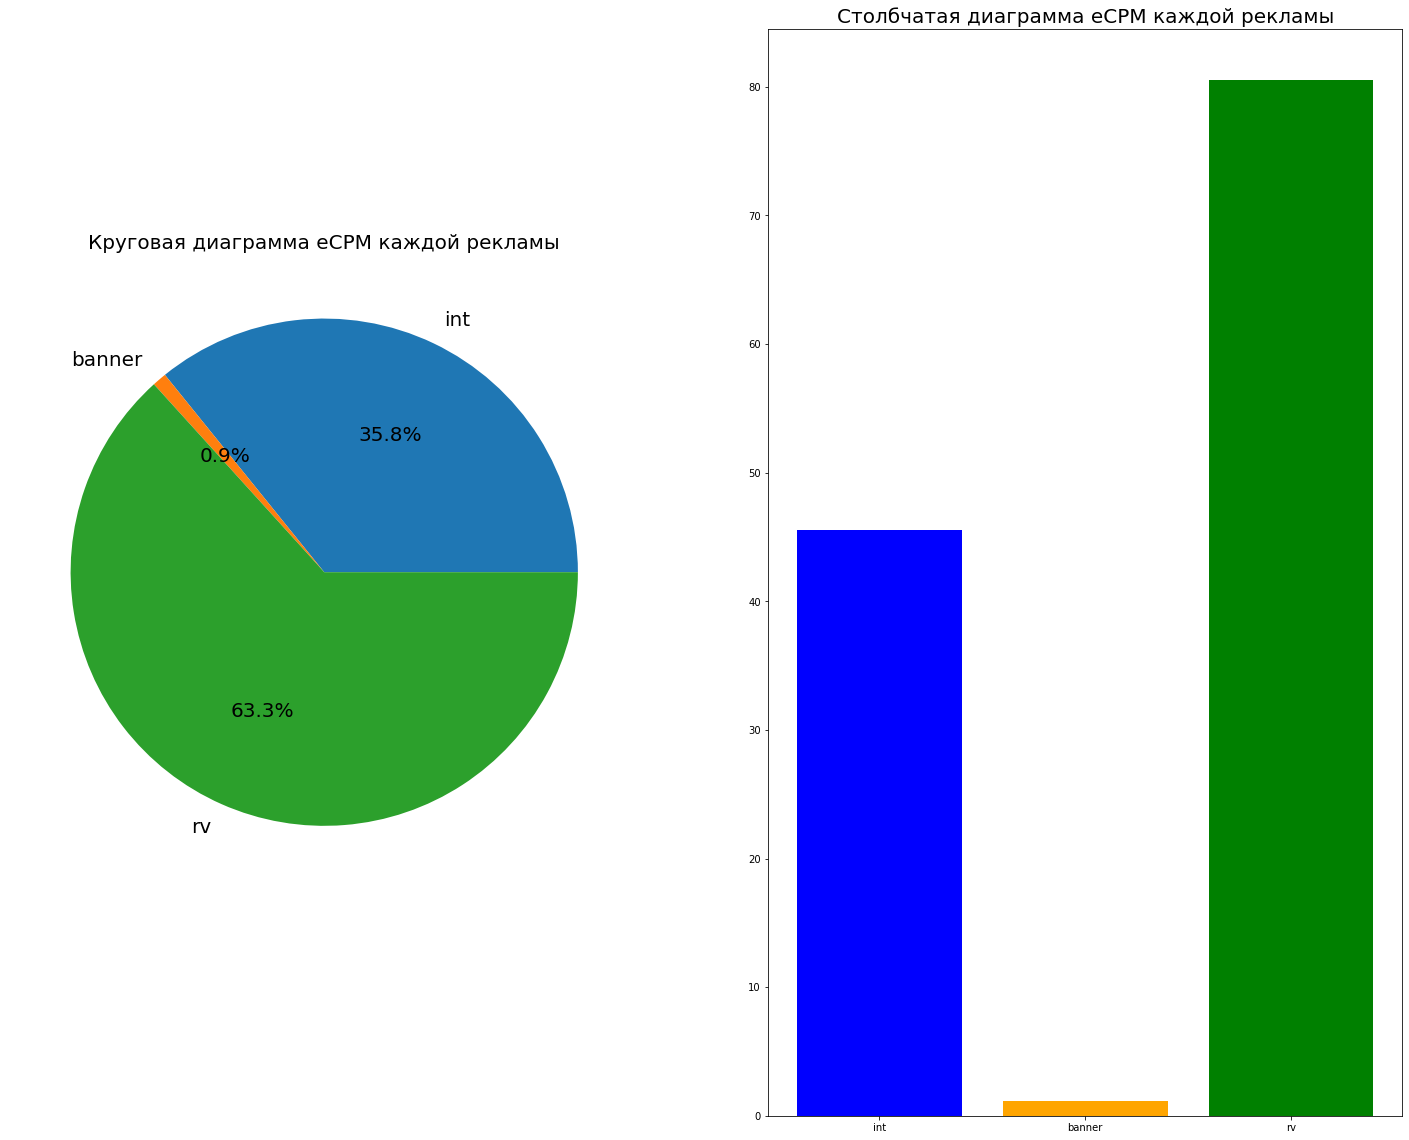

In [20]:
labels = ['int', 'banner', 'rv']
sizes = [int_eCPM,banner_eCPM, rv_eCPM]
positions = np.arange(3)
figure = plt.figure(figsize = (25,20))
ax1 = figure.add_subplot(1,2,1)
ax2 = figure.add_subplot(1,2,2)
ax1.pie(sizes, labels=labels,textprops ={"fontsize":20}, autopct='%.1f%%')
ax1.set_title('Круговая диаграмма eCPM каждой рекламы',fontsize=20)
ax2.bar(positions, sizes, color = ['blue', 'orange', 'green'])
ax2.set_xticks(positions)
ax2.set_xticklabels(labels)
ax2.set_title('Столбчатая диаграмма eCPM каждой рекламы',fontsize=20)
plt.show()

## 1.2 построить распределение eCPM-ов по городам, версиям ОС для каждого формата рекламы

Пропусков слишком много, наверное не разумно удалять их. Поэтому воспользуемся следующим алгоритмом. Скорее всего, некоторые пользователи указали лишь единожды свой город, а после уже не указывали. Сгруппируем пользователей и отберем тех, кто указывал, только один город.(у некоторых пользователей их два). и на месте пропушенных значений укажем тот город, который он когда-то указывал.

In [21]:
df_city = (df_prepared[['profile_id', 'city']].groupby(['profile_id', 'city']). #группируем по profile_id, city
                    count().                                                            
                    reset_index())
df_unique_city = df_city.groupby('profile_id').count().query('city==1').reset_index() # группируем по profile_id и отбираем
                                                                                 # только те города, которые указаны 1 раз 
df_city = df_city.merge(df_unique_city, on = 'profile_id' )# объединяем результат
df_city.drop(columns = 'city_y', inplace = True)
#заполним пропуски благодаря этой таблице
df_prepared_city = df_prepared.merge(df_city, on= 'profile_id', how = 'left')
df_prepared_city['city_true'] = np.where(df_prepared_city['city'].isna(), df_prepared_city['city_x'],df_prepared_city['city'])


In [22]:
print('Было пропусков: {}'.format(df_prepared_city['city'].isna().sum()))
print('Стало: {}'.format(df_prepared_city['city_true'].isna().sum()))

Было пропусков: 323694
Стало: 233135


Отбили 100к пропусков, что не может не радовать)))

In [23]:
#К сожалению, остальное придется удалить(
df_prepared_city.drop(columns = ['city', 'city_x'], inplace=True)

df_prepared_city.dropna(subset = ['city_true'], inplace=True)

In [24]:
df_city = df_prepared_city.drop(columns = ['profile_id'])# готовые данные по городам

In [25]:
#функция, которая возвращает df группировку по городам и значениям eCPM 
def eCPM_city(df,ad_type):
    df_group = (df.query('ad_type == @ad_type').
          groupby('city_true').agg({'revenue':'sum', 'city_true':'count'}))
    df_group.columns = ['revenue_sum', 'count_city']
    df_group['eCPM'] = df_group['revenue_sum']/df_group['count_city']*1000
    return df_group
          
banner_city = eCPM_city(df_city, "banner").sort_values(by = 'eCPM', ascending = False).reset_index()    
rv_city =  eCPM_city(df_city, "rv").sort_values(by = 'eCPM', ascending = False).reset_index()  
int_city = eCPM_city(df_city, "int").sort_values(by = 'eCPM', ascending = False).reset_index()     

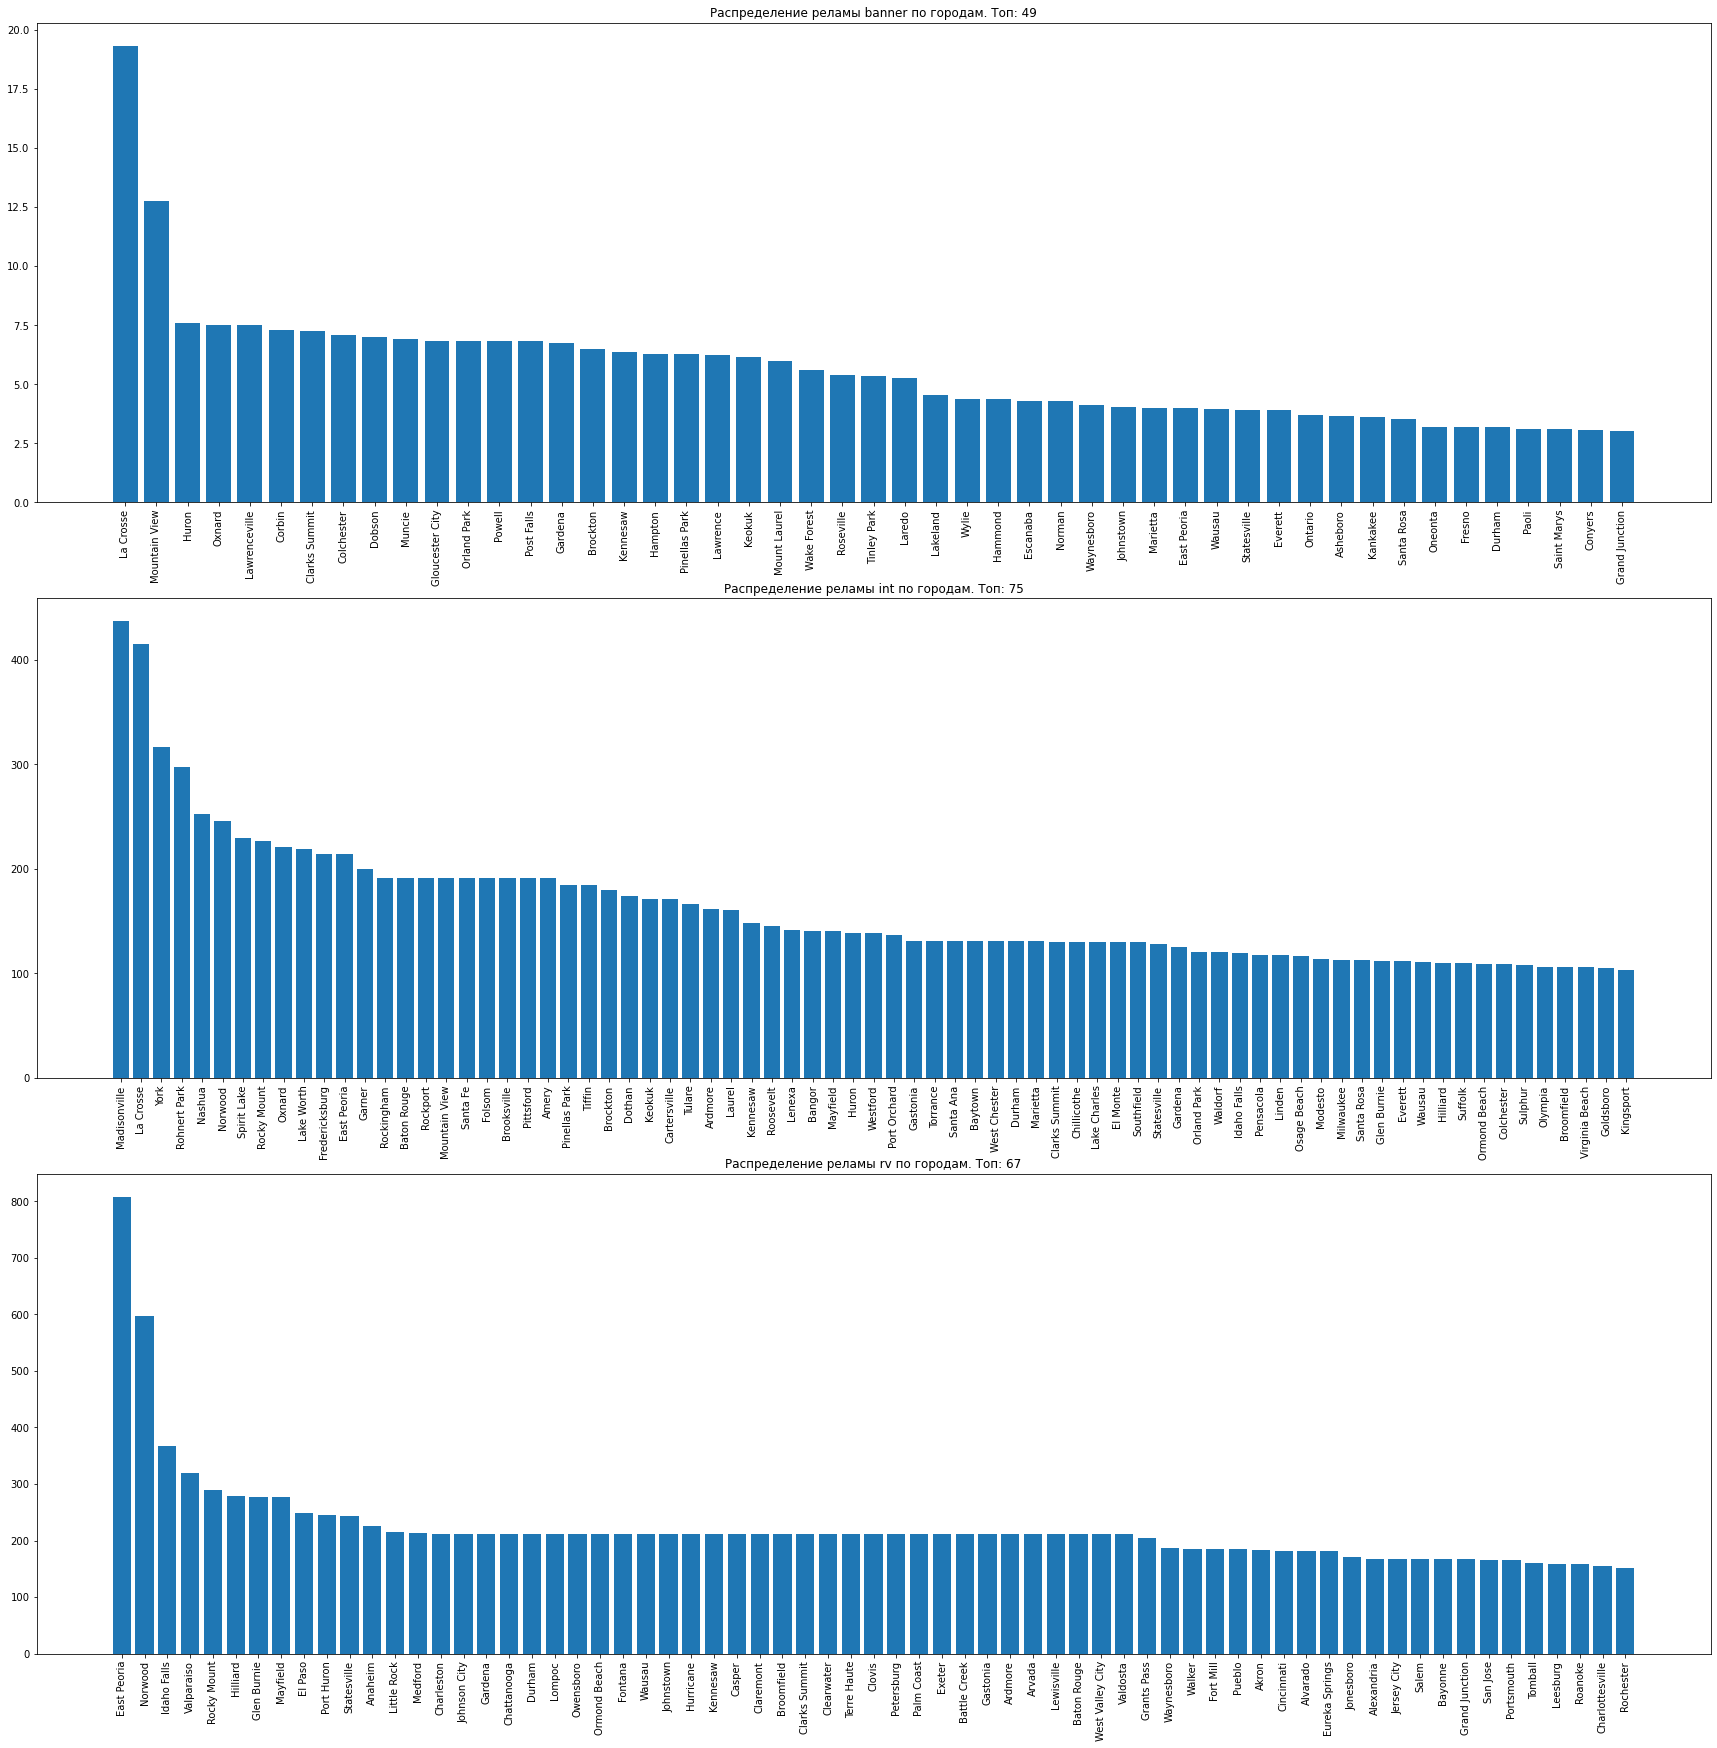

In [53]:
#нарисуем графики распределений
len_banner = len(banner_city[banner_city['eCPM']>3])
len_rv = len(rv_city[rv_city['eCPM']>150])
len_int = len(int_city[int_city['eCPM']>100])
labels = ['int', 'banner', 'rv']

sizes_banner = banner_city[banner_city['eCPM']>3]['eCPM']
sizes_rv = rv_city[rv_city['eCPM']>150]['eCPM']
sizes_int = int_city[int_city['eCPM']>100]['eCPM']

positions_banner = np.arange(len_banner)
positions_rv = np.arange(len_rv)
positions_int = np.arange(len_int)



figure = plt.figure(figsize = (30,30))
ax1 = figure.add_subplot(3,1,1)
ax2 = figure.add_subplot(3,1,2)
ax3 = figure.add_subplot(3,1,3)

ax1.bar(positions_banner, sizes_banner)
ax1.set_xticks(positions_banner)
ax1.set_xticklabels(banner_city[banner_city['eCPM']>3]['city_true'], rotation='vertical')
ax1.set_title('Распределение реламы banner по городам. Топ: {}'.format(len_banner))


ax2.bar(positions_int, sizes_int)
ax2.set_xticks(positions_int)
ax2.set_xticklabels(int_city[int_city['eCPM']>100]['city_true'], rotation='vertical')
ax2.set_title('Распределение реламы int по городам. Топ: {}'.format(len_int))


ax3.bar(positions_rv, sizes_rv)
ax3.set_xticks(positions_rv)
ax3.set_xticklabels(rv_city[rv_city['eCPM']>150]['city_true'], rotation='vertical')
ax3.set_title('Распределение реламы rv по городам. Топ: {}'.format(len_rv))
plt.show()

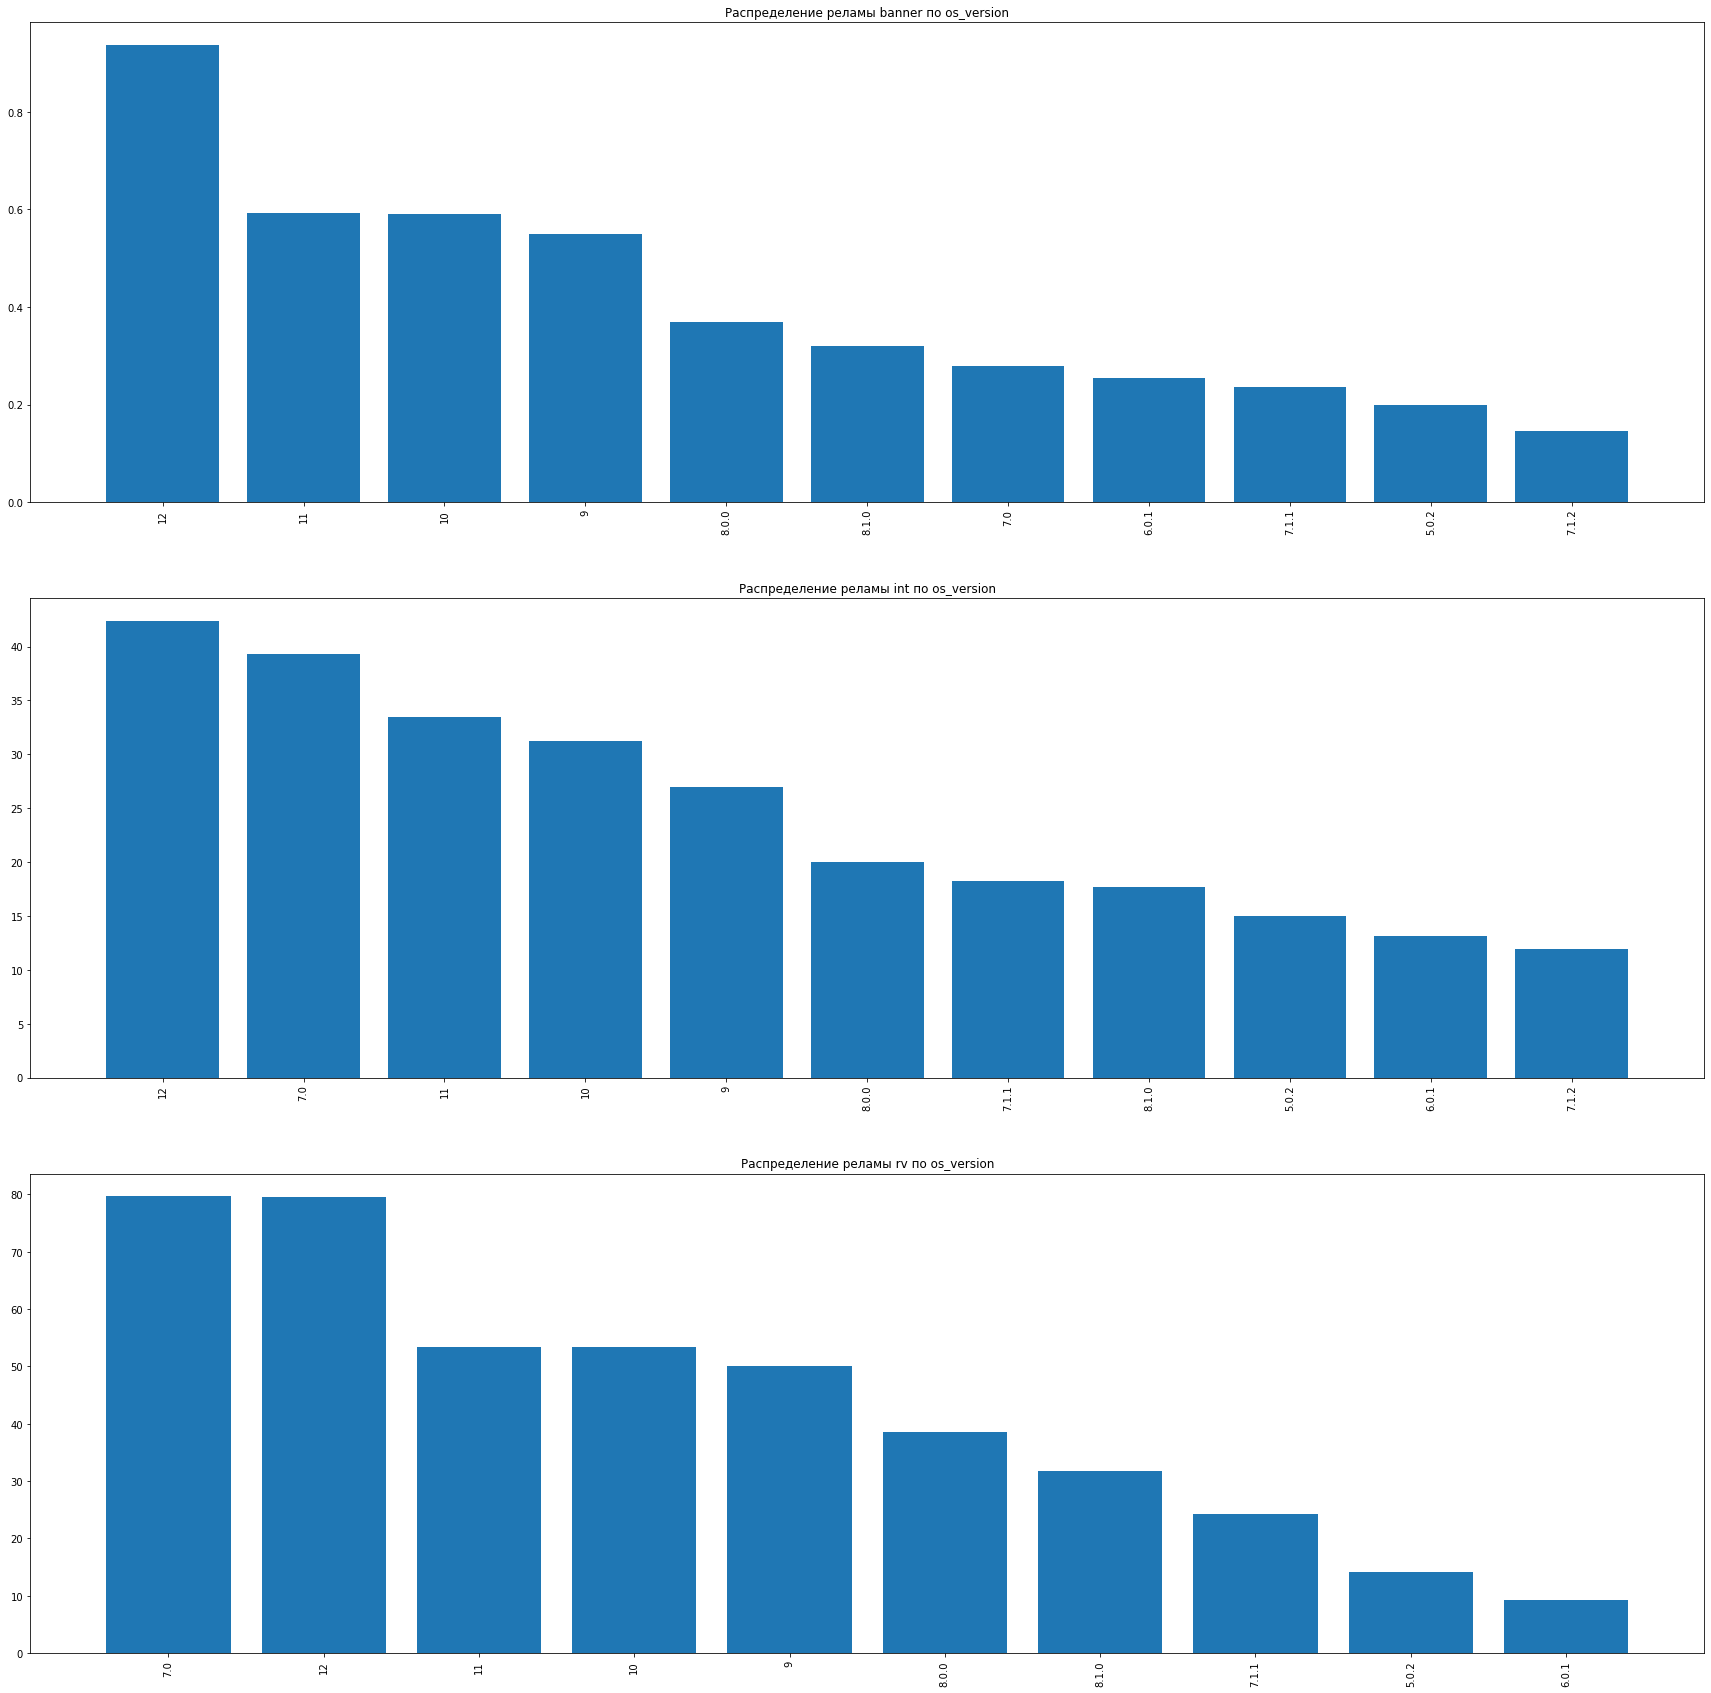

In [130]:
#сделаем тоже самое, но для версии ос
def eCPM_oc(df,ad_type):
    df_group = (df.query('ad_type == @ad_type').
          groupby('os_version').agg({'revenue':'sum', 'os_version':'count'}))
    df_group.columns = ['revenue_sum', 'count_os_version']
    df_group['eCPM'] = df_group['revenue_sum']/df_group['count_os_version']*1000
    return df_group

banner_oc = eCPM_oc(df_prepared,"banner").reset_index().sort_values(by = 'eCPM', ascending = False) 
int_oc = eCPM_oc(df_prepared,"int").reset_index().sort_values(by = 'eCPM', ascending = False) 
rv_oc = eCPM_oc(df_prepared,"rv").reset_index().sort_values(by = 'eCPM', ascending = False)


len_banner = banner_oc.shape[0]
len_rv = rv_oc.shape[0]
len_int = int_oc.shape[0]

sizes_banner = banner_oc['eCPM']
sizes_rv = rv_oc['eCPM']
sizes_int = int_oc['eCPM']

positions_banner = np.arange(len_banner)
positions_rv = np.arange(len_rv)
positions_int = np.arange(len_int)



figure = plt.figure(figsize = (30,30))
ax1 = figure.add_subplot(3,1,1)
ax2 = figure.add_subplot(3,1,2)
ax3 = figure.add_subplot(3,1,3)

ax1.bar(positions_banner, sizes_banner)
ax1.set_xticks(positions_banner)
ax1.set_xticklabels(banner_oc['os_version'], rotation='vertical')
ax1.set_title('Распределение реламы banner по os_version')


ax2.bar(positions_int, sizes_int)
ax2.set_xticks(positions_int)
ax2.set_xticklabels(int_oc['os_version'], rotation='vertical')
ax2.set_title('Распределение реламы int по os_version')


ax3.bar(positions_rv, sizes_rv)
ax3.set_xticks(positions_rv)
ax3.set_xticklabels(rv_oc['os_version'], rotation='vertical')
ax3.set_title('Распределение реламы rv по os_version')
plt.show()

##  1.3 построить распределение доходов по городам, версиям ОС 

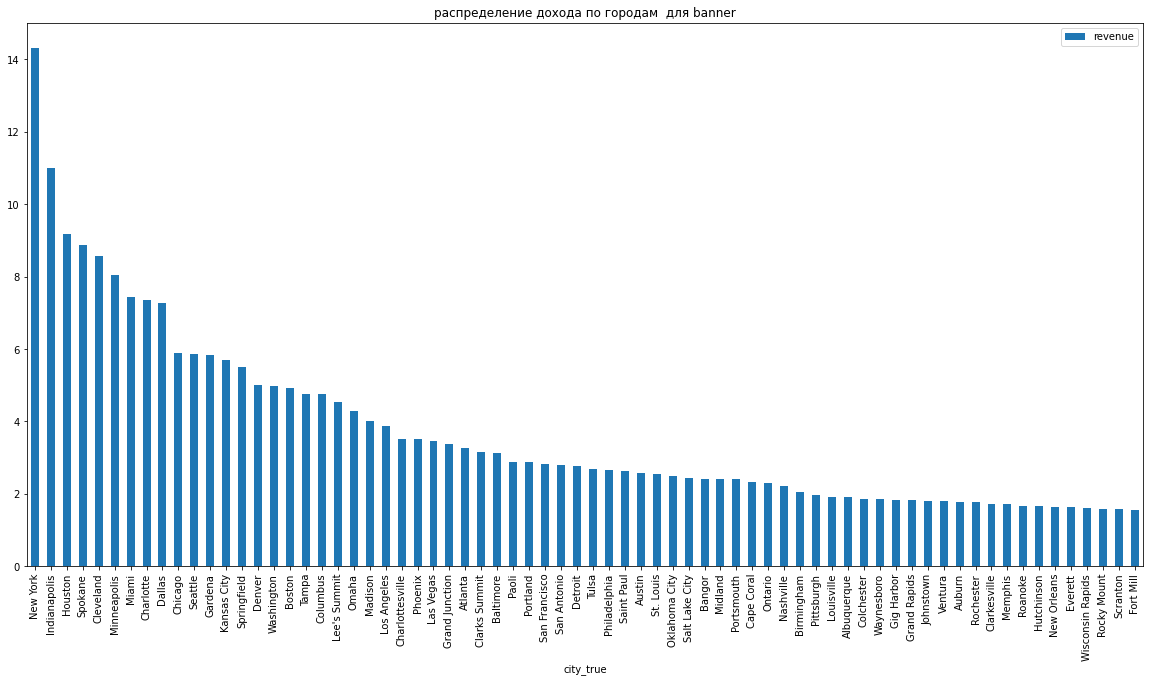

In [116]:
#распределение доходов по городам
def revenue_city(df_city, ad_type):
    fig = (df_city.query('ad_type == @ad_type').
             groupby('city_true').
             agg({'revenue':'sum'}).
             reset_index().
             sort_values(by = 'revenue', ascending = False)
             )[:70].plot(x = 'city_true', y = 'revenue',kind = 'bar', figsize = (20,10), 
                         title = ('распределение дохода по городам  для '+ad_type))
             
    return fig

revenue_city(df_city, "banner")

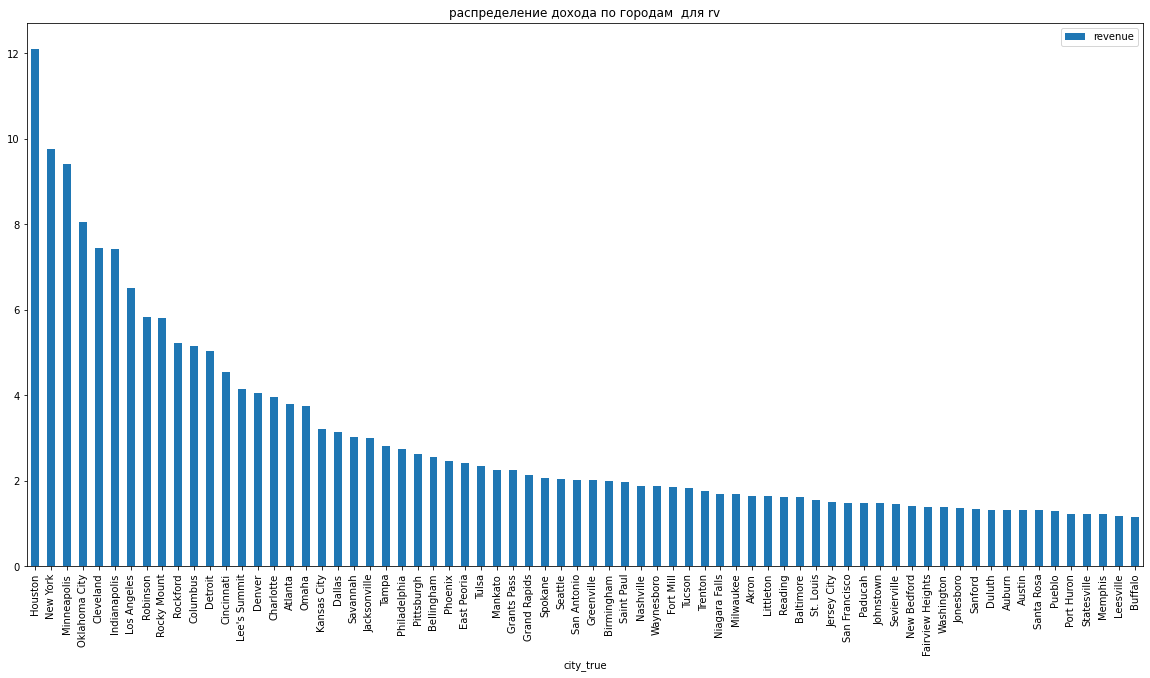

In [117]:
revenue_city(df_city, "rv")

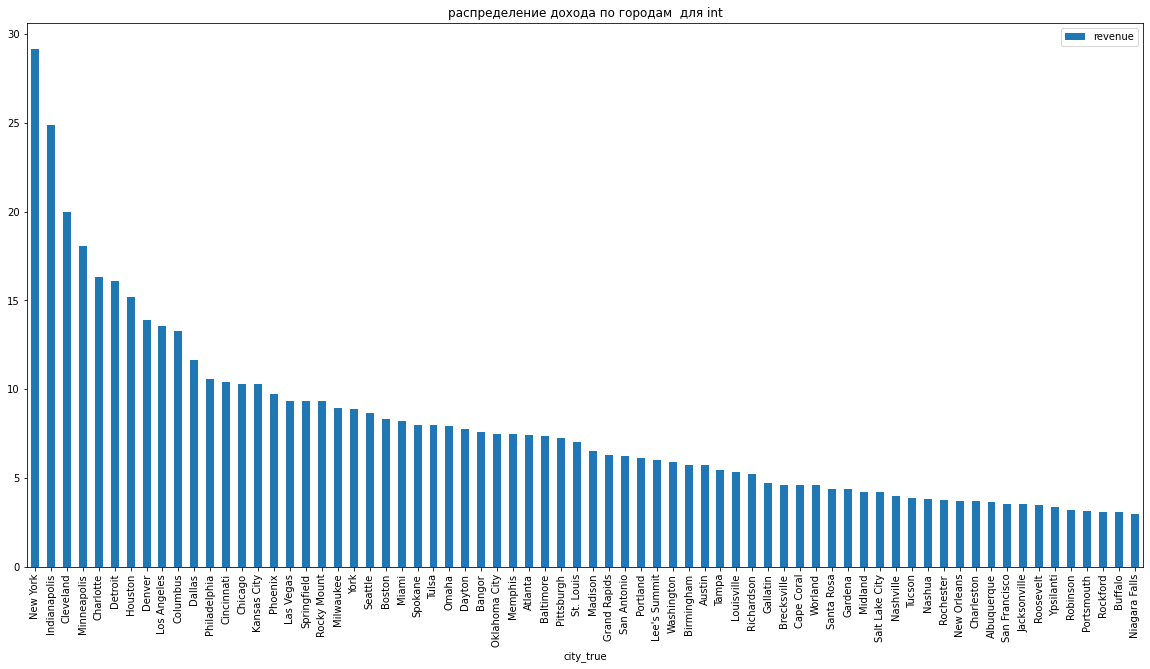

In [118]:
revenue_city(df_city, "int")

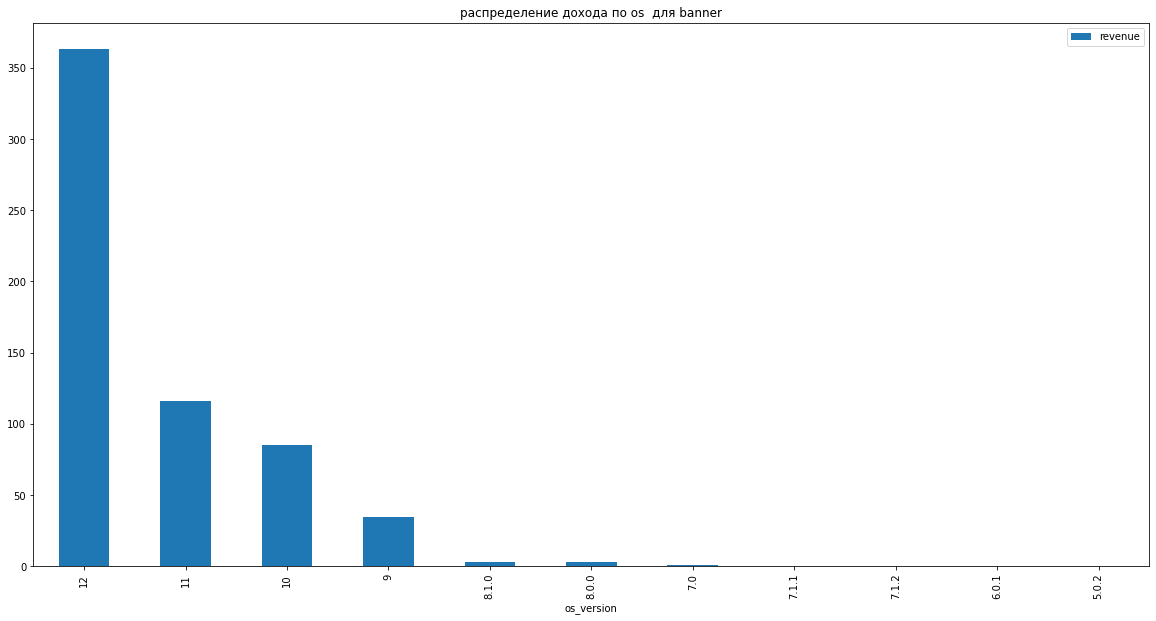

In [123]:
# распределения доходов по oc
def revenue_oc(df_city, ad_type):
    fig = (df_city.query('ad_type == @ad_type').
             groupby('os_version').
             agg({'revenue':'sum'}).
             reset_index().
             sort_values(by = 'revenue', ascending = False)
             )[:70].plot(x = 'os_version', y = 'revenue',kind = 'bar', figsize = (20,10), 
                         title = ('распределение дохода по os  для '+ad_type))
             
    return fig

revenue_oc(df_prepared, "banner")

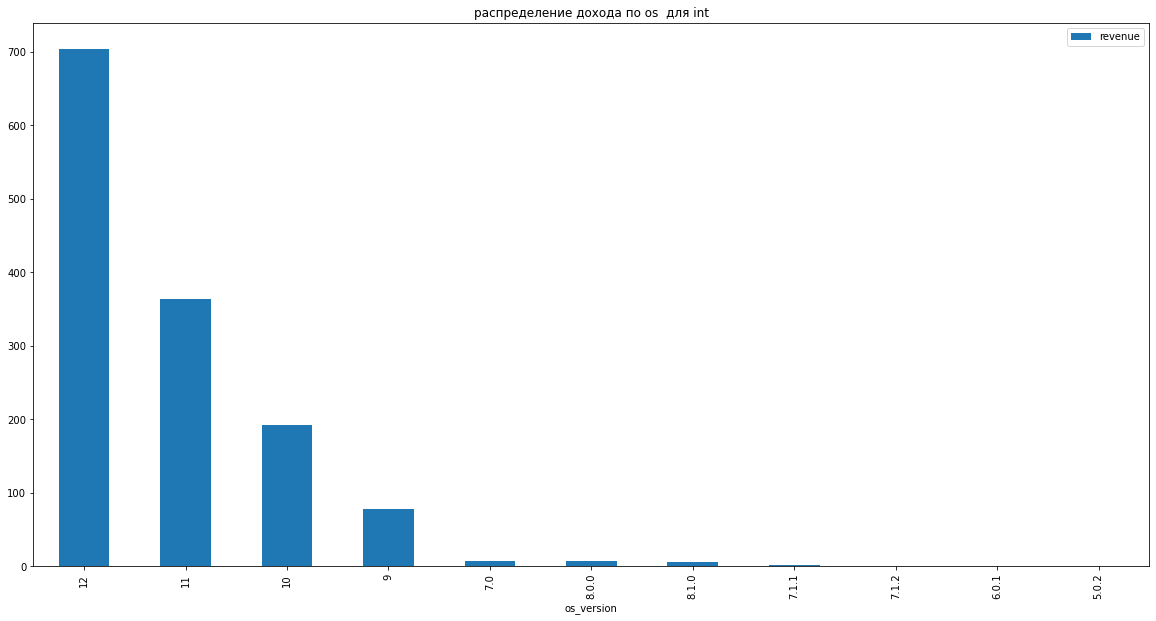

In [124]:
revenue_oc(df_prepared, "int")

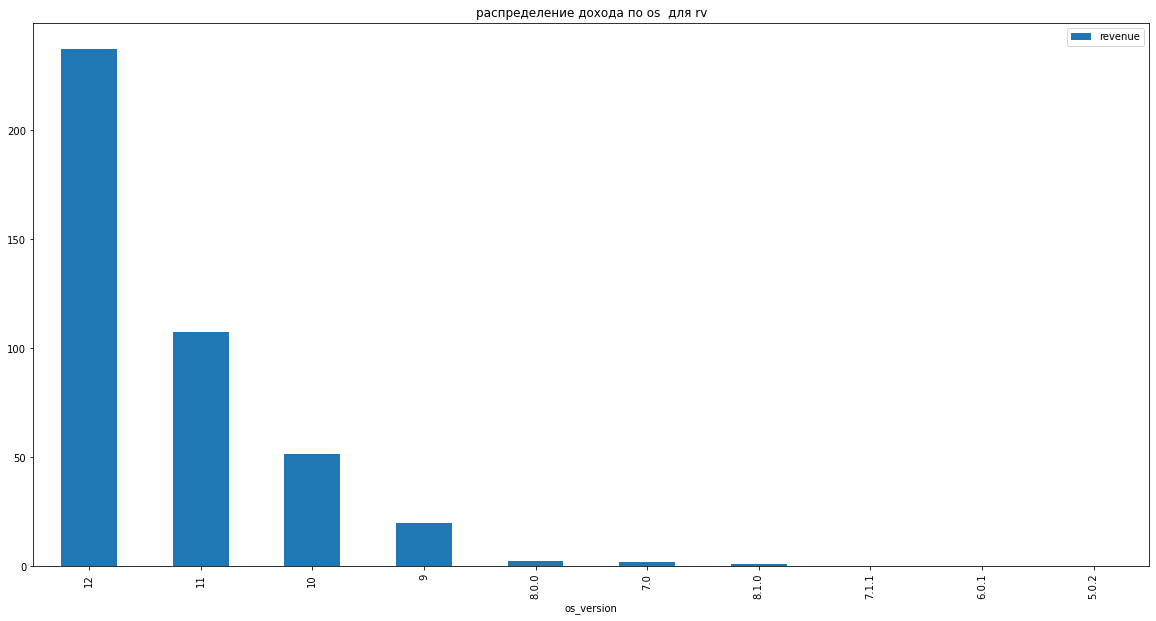

In [126]:
revenue_oc(df_prepared, "rv")

# Задание 2. Учесть статистическую значимость (отобразить, отфильтровать незначимое или хотя бы прокомментировать). Объяснить решение.

не совсем понял задание, если подразумевается детекция выбросов, то это можно сделать через boxplot. Все что дальше усов можно отсечь. Если про уровень значимости (p value) не совсем понимаю как это тут реализовать и какие гипотезы выдвигать. Прошу прощение, что не справился с этим. 

# Задание 3. Описать наблюдения и вывод по исследованию.

По первому заданию можно сделать следующий вывод:
     1. Самыми перспективными рекламами считаются rv (63.3%) и int(35.8%)
     2. Для рекламы типа banner  самая высокая метрика eCPM в городах La Crosse(19) и Mountain View(12.5)
     3. Для рекламы типа int самая высокая метрика eCPM в городах Madisonville(450) и La Crosse(410)
     4.Для рекламы типа rv самая высокая метрика eCPM в города East Peoria(800), Norwood(600)
Для всех типов рекламы вывели распределение метрики eCPM по городам.
     5.Наибольшая метрика по рекламам типа банер у людей с oc 12 и 11
     6.Для типа рекламы int наибольшая  метрика характерна для людей с версиями 12, 7.0 и 11
     7. А для rv с версиями 7.0, 12
     8. Для типа banner и int самым прибыльным является New York, для rv - Houston
     9. Для всех типов рекламы самой прибольной oc является 12